In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [23]:
processed_data_path = Path("../data/processed")
weather = pd.read_csv(processed_data_path / "weather.csv", parse_dates=["date"])
parks_data = pd.read_csv(processed_data_path / "parks-data-long.csv", parse_dates=["date"])
df = (pd
      .merge(parks_data, weather, on="date")
      .loc[lambda x: x['variable'] == 'revenue']
      .rename(columns={'value':'revenue'})
      .drop(columns=['variable'])
      .assign(facility=lambda x: x['facility'].str.title(),
              month=lambda x: x['date'].dt.month_name(),
              weekday=lambda x: x['date'].dt.day_name(),
              year=lambda x: x['date'].dt.year,
      )
)

df.head()

,date,park_name,facility,revenue,temp_f,precip_in,month,weekday,year
2,2022-06-01,Groveland Oaks,Campground,108,75,0.42,June,Wednesday,2022
3,2022-06-01,Addison Oaks,Campground,80,75,0.42,June,Wednesday,2022
4,2022-06-01,Springfield Oaks,Golf,1184,75,0.42,June,Wednesday,2022
5,2022-06-01,Glen Oaks,Golf,1248,75,0.42,June,Wednesday,2022
8,2022-06-01,Red Oaks,Waterpark,402,75,0.42,June,Wednesday,2022


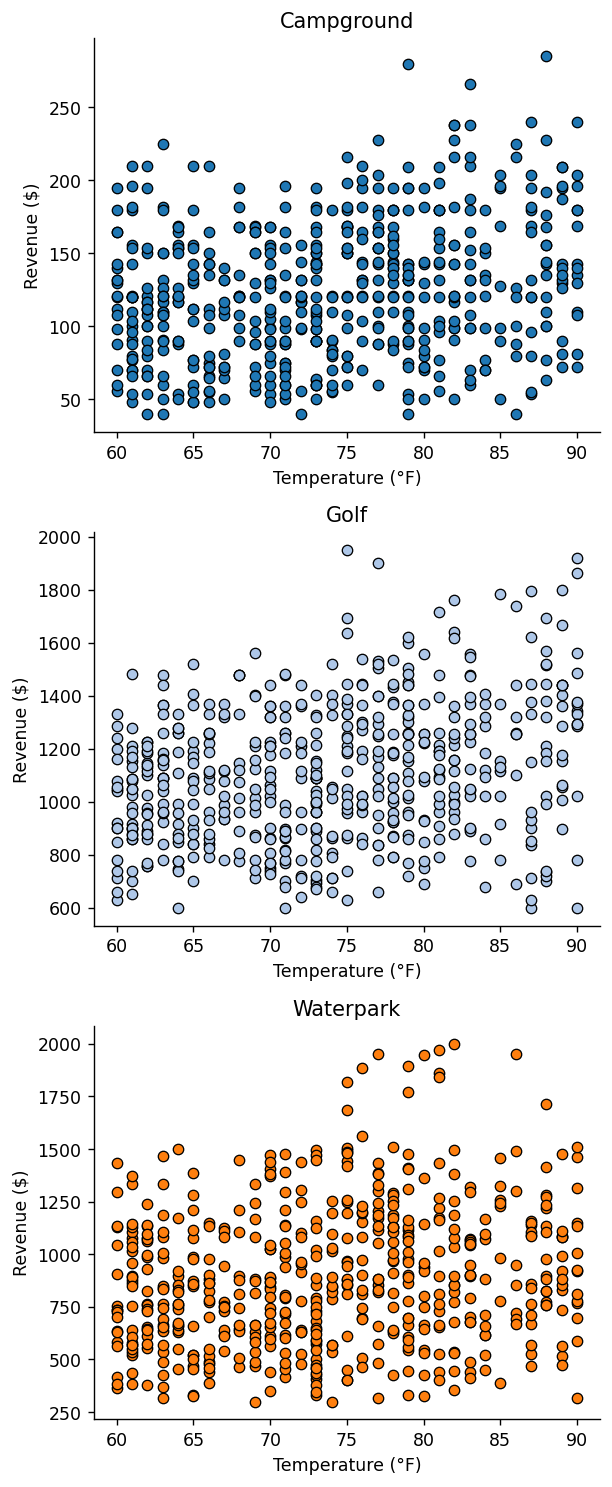

In [26]:

# Get unique facilities and prepare subplots
facilities = df['facility'].unique()
n_facilities = len(facilities)
fig, axs = plt.subplots(n_facilities, 1, figsize=(5, 4 * n_facilities), dpi=125)
cmap = plt.get_cmap('tab20')

# Check if axs is iterable (needed if only one subplot)
if n_facilities == 1:
    axs = [axs]

# Plotting revenue vs temperature
for i, facility_type in enumerate(facilities):
    ax = axs[i]
    color = cmap(i)
    subset = df[df['facility'] == facility_type]
    ax.scatter(subset['temp_f'], subset['revenue'],
               edgecolor='black', linewidth=0.75, color=color)
    ax.set_title(facility_type)
    ax.set_xlabel('Temperature (°F)')
    ax.set_ylabel('Revenue ($)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Improve overall layout
fig.tight_layout()
plt.show()

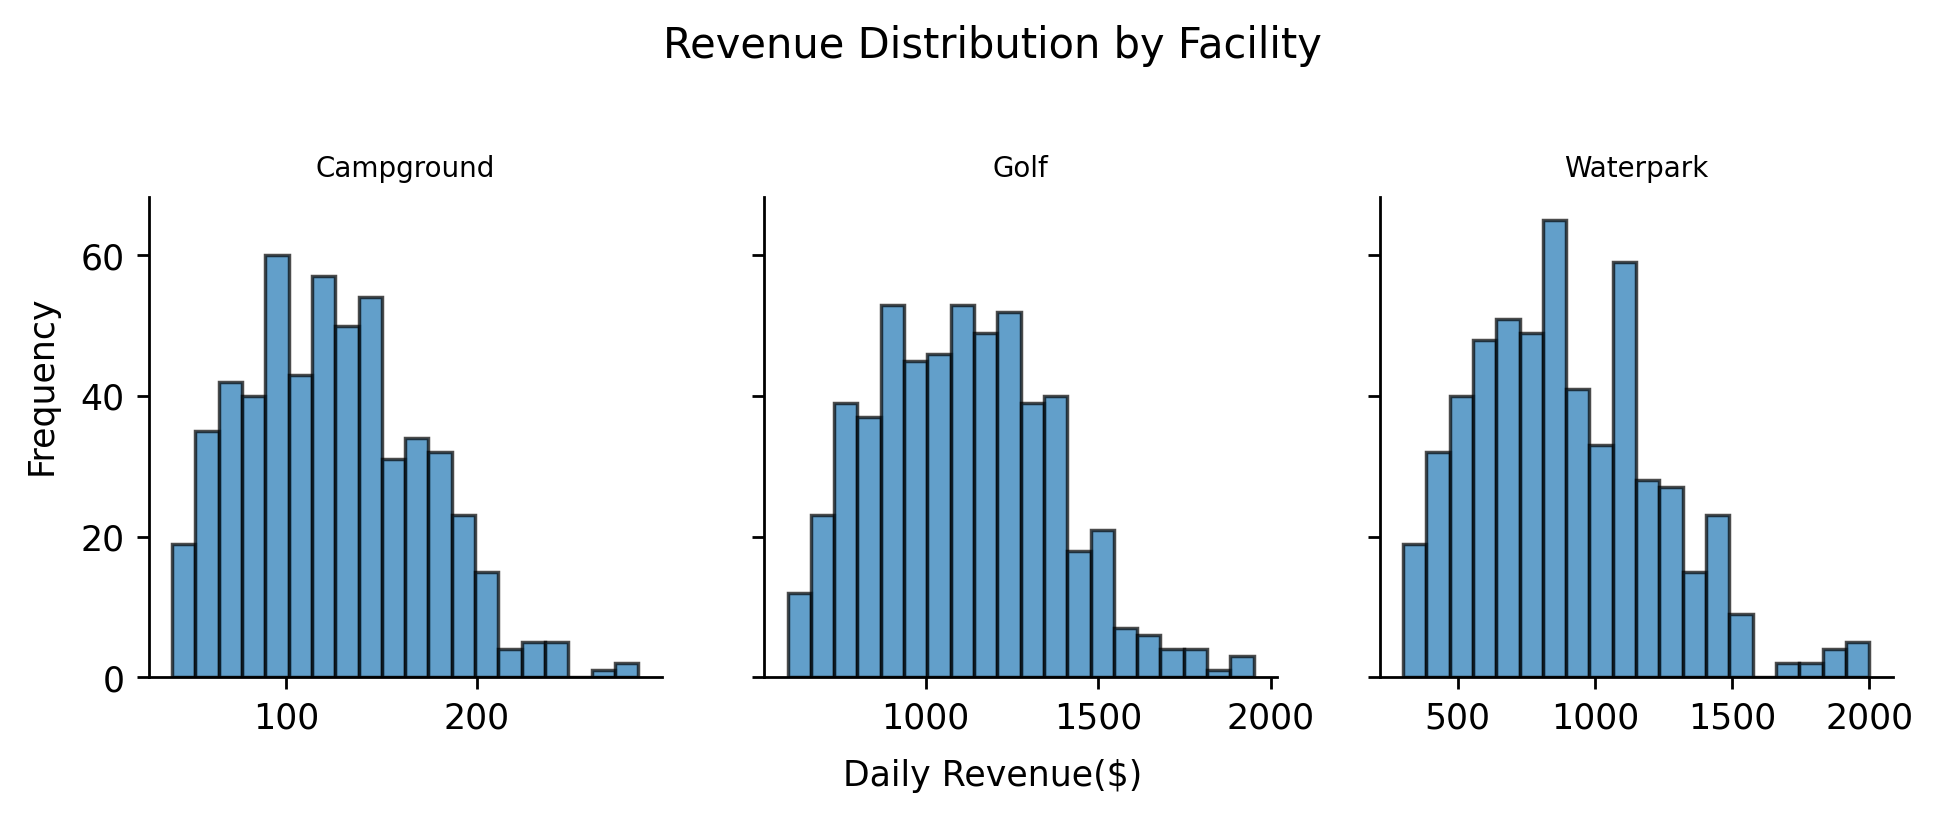

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), dpi=250, sharey=True)

for i, facility in enumerate(df['facility'].unique()):
    ax = axs[i]
    subset = df[df['facility'] == facility]
    ax.hist(subset['revenue'], bins=20, edgecolor='black',
               alpha=0.7, label=facility)
    ax.set_title(facility,fontsize=8)
    ax.spines[['right', 'top']].set_visible(False)
    
fig.text(0.07, 0.5, 'Frequency', va='center', rotation='vertical')
fig.text(0.5, 0.001, 'Daily Revenue($)', ha='center', va='top')
fig.suptitle('Revenue Distribution by Facility', fontsize=12)
fig.subplots_adjust(top=0.75)
plt.show()

,date,park_name,facility,revenue,temp_f,precip_in
2,2022-06-01,Groveland Oaks,Campground,108,75,0.42
3,2022-06-01,Addison Oaks,Campground,80,75,0.42
4,2022-06-01,Springfield Oaks,Golf,1184,75,0.42
5,2022-06-01,Glen Oaks,Golf,1248,75,0.42
8,2022-06-01,Red Oaks,Waterpark,402,75,0.42
...,...,...,...,...,...,...
3303,2024-08-31,Addison Oaks,Campground,143,65,0.18
3304,2024-08-31,Springfield Oaks,Golf,880,65,0.18
3305,2024-08-31,Glen Oaks,Golf,1147,65,0.18
3308,2024-08-31,Red Oaks,Waterpark,1280,65,0.18


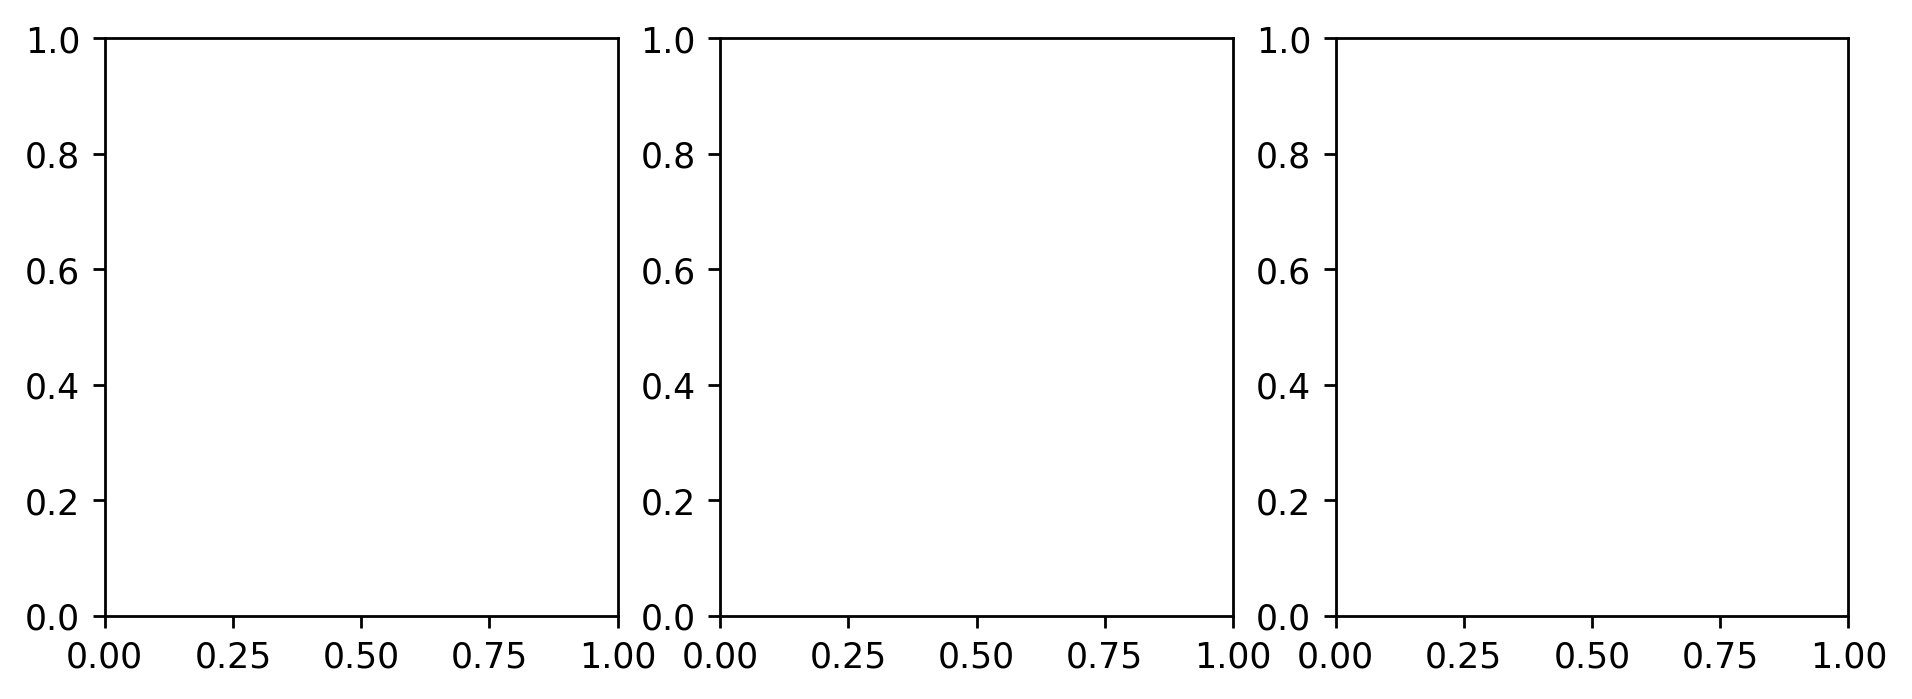

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), dpi=250)

for month in df.month.unique():
    a